<a href="https://colab.research.google.com/github/vitor-freitas1/challenge-telecom-x-churn/blob/main/challenge_telecom_x_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå 1. Extrac√£o

In [48]:
import pandas as pd
import json
import requests

file_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = None

try:
  response = requests.get(file_url)
  response.raise_for_status()
  data_list = response.json()
  df = pd.json_normalize(data_list)
  print("Dataframe carregado e normalizado com sucesso!")
  print(df.head())

except requests.exceptions.RequestException as e_req:
  print(f"ERRO ao buscar dados da URL: {e_req}")

except json.JSONDecodeError as e_json:
  print(f"ERRO: Problema ao decodificar o JSON obtido da URL: {e_json}")

except Exception as e:
  print(f"ERRO: inesperado durante o carregamento da URL: {e}")

Dataframe carregado e normalizado com sucesso!
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes          

#üîß 2. Transforma√ß√£o

## 2.1 Conhecendo o Dataset

### 2.1.1 Visualizar amostras de dados

In [49]:
df.head(10)

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   
5  0013-MHZWF    No          Female                       0               No   
6  0013-SMEOE    No          Female                       1              Yes   
7  0014-BMAQU    No            Male                       0              Yes   
8  0015-UOCOJ    No          Female                       1               No   
9  0016-QLJIS    No          Female                       0              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   
5                 Yes                9                Yes                  No   
6                  No               71                Yes                  No   
7                  No               63                Yes                 Yes   
8                  No                7                Yes                  No   
9                 Yes               65                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   
5                      DSL  ...                    No   
6              Fiber optic  ...                   Yes   
7              Fiber optic  ...                    No   
8                      DSL  ...                    No   
9                      DSL  ...                   Yes   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   
5                        No                  Yes                  Yes   
6                       Yes                  Yes                  Yes   
7                        No                  Yes                   No   
8                        No                   No                   No   
9                       Yes                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   
5                      Yes   Month-to-month                      Yes   
6                      Yes         Two year                      Yes   
7                       No         Two year                      Yes   
8                       No   Month-to-month                      Yes   
9                      Yes         Two year                      Yes   

     

In [50]:
df.tail(10)

customerID Churn customer.gender  customer.SeniorCitizen  \
7257  9975-SKRNR    No            Male                       0   
7258  9978-HYCIN    No            Male                       1   
7259  9979-RGMZT    No          Female                       0   
7260  9985-MWVIX   Yes          Female                       0   
7261  9986-BONCE   Yes          Female                       0   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
7257               No                  No                1                Yes   
7258              Yes                 Yes               47                Yes   
7259               No                  No                7                Yes   
7260               No                  No                1                Yes   
7261               No                  No                4                Yes   
7262               No                  No               13                Yes   
7263              Yes                  No               22                Yes   
7264               No                  No                2                Yes   
7265              Yes                 Yes               67                Yes   
7266              Yes                 Yes               63                 No   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
7257                  No                       No  ...   No internet service   
7258                  No              Fiber optic  ...                   Yes   
7259                  No              Fiber optic  ...                   Yes   
7260                  No              Fiber optic  ...                    No   
7261                  No                       No  ...   No internet service   
7262                  No                      DSL  ...                    No   
7263                 Yes              Fiber optic  ...                    No   
7264                  No                      DSL  ...                   Yes   
7265                  No                      DSL  ...                    No   
7266    No phone service                      DSL  ...                   Yes   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
7257       No internet service  No internet service  No internet service   
7258                        No                   No                  Yes   
7259                        No                   No                  Yes   
7260                        No                   No                   No   
7261       No internet service  No internet service  No internet service   
7262                        No                  Yes                   No   
7263                        No                   No                   No   
7264                        No                   No                   No   
7265                       Yes                  Yes                   No   
7266                       Yes                   No                  Yes   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
7257      No internet service   Month-to-month                       No   
7258                       No         One year                      Yes   
7259                      Yes         One year                      Yes   
7260                       No   Month-to-month                      Yes   
7261      No internet service   Month-to-month                       No   
7262                       No         One year                       No   
7263                      Yes   Month-to-month                      Yes   
7264                       No   Month-to-month                      Y

In [51]:
df.sample(10)

customerID Churn customer.gender  customer.SeniorCitizen  \
5672  7750-EYXWZ    No          Female                       0   
432   0620-DLSLK    No          Female                       0   
4847  6631-HMANX    No            Male                       0   
1444  2075-PUEPR    No            Male                       0   
3296  4597-ELFTS   Yes            Male                       0   
5816  7963-GQRMY   Yes          Female                       0   
4915  6719-OXYBR    No            Male                       0   
3399  4710-FDUIZ   Yes            Male                       0   
68    0112-QWPNC   Yes            Male                       0   
6793  9367-WXLCH   Yes            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
5672               No                  No               12                 No   
432                No                  No               13                Yes   
4847              Yes                  No               72                Yes   
1444              Yes                 Yes               55                Yes   
3296               No                  No               56                Yes   
5816              Yes                 Yes                3                Yes   
4915               No                  No               15                Yes   
3399              Yes                  No               56                Yes   
68                Yes                  No               49                Yes   
6793               No                  No                8                Yes   

     phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
5672    No phone service                      DSL  ...                   Yes   
432                   No              Fiber optic  ...                    No   
4847                 Yes                      DSL  ...                   Yes   
1444                  No                       No  ...   No internet service   
3296                 Yes                       No  ...   No internet service   
5816                  No                      DSL  ...                    No   
4915                  No              Fiber optic  ...                    No   
3399                 Yes              Fiber optic  ...                   Yes   
68                   Yes                      DSL  ...                    No   
6793                 Yes              Fiber optic  ...                    No   

     internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
5672                       Yes                  Yes                  Yes   
432                         No                   No                  Yes   
4847                       Yes                  Yes                  Yes   
1444       No internet service  No internet service  No internet service   
3296       No internet service  No internet service  No internet service   
5816                        No                   No                   No   
4915                       Yes                   No                  Yes   
3399                        No                   No                  Yes   
68                         Yes                  Yes                  Yes   
6793                        No                   No                   No   

     internet.StreamingMovies account.Contract account.PaperlessBilling  \
5672                      Yes         One year                       No   
432                        No   Month-to-month                      Yes   
4847                      Yes         Two year                      Yes   
1444      No internet service         Two year                       No   
3296      No internet service         One year                       No   
5816                       No   Month-to-month                       No   
4915                       No   Month-to-month                       No   
3399                      Yes         One year                       

### 2.1.2 Estrutura geral e tipo de dados

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [53]:
df.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

### 2.1.3 Dimens√µes do Dataset

In [54]:
df.shape

(7267, 21)

### 2.1.4 Nomes das colunas

In [55]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## 2.2 Verificando inconsist√™ncias nos dados

### 2.2.1 Valores ausentes

In [56]:
df.isnull().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

### 2.2.2 Valores duplicados

In [57]:
df.duplicated().sum()

np.int64(0)

### 2.2.3 Erros de formata√ß√£o

In [58]:
print(" Iniciando inspe√ß√£o de 'account.Charges.Total'...")

# Tenta converter para num√©rico com coercion
coluna_original = df['account.Charges.Total']
coluna_convertida = pd.to_numeric(coluna_original, errors='coerce')

# Identifica valores que n√£o puderam ser convertidos
valores_invalidos = coluna_original[coluna_convertida.isnull()]

if not valores_invalidos.empty:
    print(f" {len(valores_invalidos)} valores problem√°ticos encontrados com: {valores_invalidos.unique()}")

else:
    print(" Nenhum valor problem√°tico encontrado.")

# Aplica convers√£o definitiva
df['account.Charges.Total'] = coluna_convertida

# Resultado
nan_count = df['account.Charges.Total'].isnull().sum()
print(f" Total de NaNs ap√≥s convers√£o: {nan_count}")
print(f" Tipo final da coluna: {df['account.Charges.Total'].dtype}")


 Iniciando inspe√ß√£o de 'account.Charges.Total'...
 11 valores problem√°ticos encontrados com: [' ']
 Total de NaNs ap√≥s convers√£o: 11
 Tipo final da coluna: float64


### 2.2.4 Inconsist√™ncias nos dados



‚ú®**Verificando quais colunas possuem valores inconsistentes**‚ú®




In [59]:
colunas_categoricas = [
    'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod'
]

print("\n--- Verificando Valores √önicos em Colunas Categ√≥ricas ---")
for coluna in colunas_categoricas:
    if coluna in df.columns:
        print(f"\nValores √∫nicos para a coluna '{coluna}':")
        print(df[coluna].unique())
    else:
        print(f"\nColuna '{coluna}' n√£o encontrada no DataFrame.")


--- Verificando Valores √önicos em Colunas Categ√≥ricas ---

Valores √∫nicos para a coluna 'Churn':
['No' 'Yes' '']

Valores √∫nicos para a coluna 'customer.gender':
['Female' 'Male']

Valores √∫nicos para a coluna 'customer.Partner':
['Yes' 'No']

Valores √∫nicos para a coluna 'customer.Dependents':
['Yes' 'No']

Valores √∫nicos para a coluna 'phone.PhoneService':
['Yes' 'No']

Valores √∫nicos para a coluna 'phone.MultipleLines':
['No' 'Yes' 'No phone service']

Valores √∫nicos para a coluna 'internet.InternetService':
['DSL' 'Fiber optic' 'No']

Valores √∫nicos para a coluna 'internet.OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores √∫nicos para a coluna 'internet.OnlineBackup':
['Yes' 'No' 'No internet service']

Valores √∫nicos para a coluna 'internet.DeviceProtection':
['No' 'Yes' 'No internet service']

Valores √∫nicos para a coluna 'internet.TechSupport':
['Yes' 'No' 'No internet service']

Valores √∫nicos para a coluna 'internet.StreamingTV':
['Yes' 'No' 'No intern

‚ú®**Substituindo os valores em branco por nan**‚ú®




In [60]:
import numpy as np

# Definir o valor que queremos encontrar e substituir
valor_problematico = ''

# Contar quantas strings vazias existem na coluna 'Churn'
contagem_problema_churn = (df['Churn'] == valor_problematico).sum()

if contagem_problema_churn > 0:
    print(f"Encontrados {contagem_problema_churn} registros com string vazia ('{valor_problematico}') na coluna 'Churn'.")

    # Substituir string vazia por NaN
    df['Churn'] = df['Churn'].replace(valor_problematico, np.nan)

    print(f"Strings vazias ('{valor_problematico}') na coluna 'Churn' foram substitu√≠das por NaN.")

    # Verificar os valores √∫nicos novamente para confirmar a mudan√ßa
    print("\nValores √∫nicos para a coluna 'Churn' ap√≥s a corre√ß√£o:")
    print(df['Churn'].unique())

    # Verificar a contagem de valores ausentes (NaN) em 'Churn' agora
    print(f"\nTotal de valores ausentes (NaN) em 'Churn' ap√≥s a corre√ß√£o: {df['Churn'].isnull().sum()}")
else:
    print(f"Nenhuma string vazia ('{valor_problematico}') encontrada na coluna 'Churn' para corrigir.")

Encontrados 224 registros com string vazia ('') na coluna 'Churn'.
Strings vazias ('') na coluna 'Churn' foram substitu√≠das por NaN.

Valores √∫nicos para a coluna 'Churn' ap√≥s a corre√ß√£o:
['No' 'Yes' nan]

Total de valores ausentes (NaN) em 'Churn' ap√≥s a corre√ß√£o: 224


## 2.3 Tratando as inconsist√™ncias

### ‚ú®Removendo as linhas com valores NaNs da coluna Churn‚ú®

In [61]:
print(f"Tamanho do DataFrame antes de remover NaNs da coluna 'Churn': {df.shape}")

# Remover linhas onde a coluna 'Churn' √© NaN
df.dropna(subset=['Churn'], inplace=True)

print(f"Tamanho do DataFrame depois de remover NaNs da coluna 'Churn': {df.shape}")

# Verificar novamente os valores ausentes e √∫nicos em 'Churn'
print(f"\nTotal de valores ausentes (NaN) em 'Churn' ap√≥s remover as linhas: {df['Churn'].isnull().sum()}")
print(f"Valores √∫nicos para a coluna 'Churn' ap√≥s remover as linhas: {df['Churn'].unique()}")

Tamanho do DataFrame antes de remover NaNs da coluna 'Churn': (7267, 21)
Tamanho do DataFrame depois de remover NaNs da coluna 'Churn': (7043, 21)

Total de valores ausentes (NaN) em 'Churn' ap√≥s remover as linhas: 0
Valores √∫nicos para a coluna 'Churn' ap√≥s remover as linhas: ['No' 'Yes']


### ‚ú®Investigando valores NaNs da coluna account.Charges.Total‚ú®

In [62]:
# C√©lula de Investiga√ß√£o dos NaNs em account.Charges.Total
if df is not None and 'account.Charges.Total' in df.columns:
    clientes_total_nan = df[df['account.Charges.Total'].isnull()]
    if not clientes_total_nan.empty:
        print("Clientes com account.Charges.Total ausente:")
        print(clientes_total_nan[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']])
        print(f"\nValores √∫nicos de 'customer.tenure' para clientes com TotalCharges NaN: {clientes_total_nan['customer.tenure'].unique()}")
    else:
        print("Nenhum NaN encontrado em account.Charges.Total nesta etapa")

Clientes com account.Charges.Total ausente:
      customer.tenure  account.Charges.Monthly  account.Charges.Total
975                 0                    56.05                    NaN
1775                0                    20.00                    NaN
1955                0                    61.90                    NaN
2075                0                    19.70                    NaN
2232                0                    20.25                    NaN
2308                0                    25.35                    NaN
2930                0                    73.35                    NaN
3134                0                    25.75                    NaN
3203                0                    52.55                    NaN
4169                0                    80.85                    NaN
5599                0                    19.85                    NaN

Valores √∫nicos de 'customer.tenure' para clientes com TotalCharges NaN: [0]


### ‚ú®**Tratando os valores NaN presentes na coluna account.Charges.Total**‚ú®

In [63]:
nan_antes_tratamento_final = df['account.Charges.Total'].isnull().sum()

if nan_antes_tratamento_final > 0:
    print(f"Tratando {nan_antes_tratamento_final} NaNs restantes em 'account.Charges.Total'")
    df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0.0)
    print("NaNs em 'account.Charges.Total' foram preenchidos com 0.0.")
    print(f"Valores ausentes em 'account.Charges.Total' Ap√≥s o preenchimento: {df['account.Charges.Total'].isnull().sum()}")

else:
    print("Nenhum NaN encontrado em 'account.Charges.Total' para tratar (talvez j√° foram tratados).")

Tratando 11 NaNs restantes em 'account.Charges.Total'
NaNs em 'account.Charges.Total' foram preenchidos com 0.0.
Valores ausentes em 'account.Charges.Total' Ap√≥s o preenchimento: 0


‚ú®**Ap√≥s o tratamento de dados**‚ú®

In [64]:
print("\nVerifica√ß√£o final de valores ausentes em todo o DataFrame:")
print(df.isnull().sum().sum())


Verifica√ß√£o final de valores ausentes em todo o DataFrame:
0


## 2.4 Coluna de Contas Di√°rias

In [65]:
# Definir o n√∫mero de dias no m√™s para o c√°lculo
dias_no_mes = 30.4375

# Criar a nova coluna 'Contas_Diarias'
if 'account.Charges.Monthly' in df.columns:
    df['Contas_Diarias'] = df['account.Charges.Monthly'] / dias_no_mes
    print("Coluna 'Contas_Diarias' criada com sucesso!")

    # Verificar as primeiras linhas com a nova coluna e o tipo de dado
    print("\nPrimeiras linhas do DataFrame com a nova coluna 'Contas_Diarias':")
    print(df[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())
    print(f"\nTipo de dado da coluna 'Contas_Diarias': {df['Contas_Diarias'].dtype}")

    # Algumas estat√≠sticas descritivas da nova coluna
    print("\nEstat√≠sticas descritivas para 'Contas_Diarias':")
    print(df['Contas_Diarias'].describe())

else:
    print("ERRO: Coluna 'account.Charges.Monthly' n√£o encontrada no DataFrame.")

Coluna 'Contas_Diarias' criada com sucesso!

Primeiras linhas do DataFrame com a nova coluna 'Contas_Diarias':
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                     65.6        2.155236
1  0003-MKNFE                     59.9        1.967967
2  0004-TLHLJ                     73.9        2.427926
3  0011-IGKFF                     98.0        3.219713
4  0013-EXCHZ                     83.9        2.756468

Tipo de dado da coluna 'Contas_Diarias': float64

Estat√≠sticas descritivas para 'Contas_Diarias':
count    7043.000000
mean        2.127694
std         0.988585
min         0.599589
25%         1.166324
50%         2.311294
75%         2.951951
max         3.901437
Name: Contas_Diarias, dtype: float64


## 2.5 Padroniza√ß√£o e Transforma√ß√£o de Dados (opcional)

### Convertendo valores textuais como "Sim" e "N√£o" para valores bin√°rios (1 e 2)

In [66]:
colunas_para_mapear = ['Churn', 'customer.Partner', 'customer.Dependents',
                             'phone.PhoneService', 'account.PaperlessBilling']

print("\n--- Convertendo colunas Yes/No para 1/0 ---")
for coluna in colunas_para_mapear:
    if coluna in df.columns:
        print(f"Processando coluna: {coluna}")
        df[coluna] = df[coluna].map({'Yes': 1, 'No': 0})

        # Verificar os novos valores √∫nicos e o tipo
        print(f"Valores √∫nicos em '{coluna}' ap√≥s map: {df[coluna].unique()}")
        print(f"Tipo de '{coluna}' ap√≥s map: {df[coluna].dtype}\n")

    else:
        print(f"AVISO: Coluna '{coluna}' n√£o encontrada para mapeamento Yes/No.")


--- Convertendo colunas Yes/No para 1/0 ---
Processando coluna: Churn
Valores √∫nicos em 'Churn' ap√≥s map: [0 1]
Tipo de 'Churn' ap√≥s map: int64

Processando coluna: customer.Partner
Valores √∫nicos em 'customer.Partner' ap√≥s map: [1 0]
Tipo de 'customer.Partner' ap√≥s map: int64

Processando coluna: customer.Dependents
Valores √∫nicos em 'customer.Dependents' ap√≥s map: [1 0]
Tipo de 'customer.Dependents' ap√≥s map: int64

Processando coluna: phone.PhoneService
Valores √∫nicos em 'phone.PhoneService' ap√≥s map: [1 0]
Tipo de 'phone.PhoneService' ap√≥s map: int64

Processando coluna: account.PaperlessBilling
Valores √∫nicos em 'account.PaperlessBilling' ap√≥s map: [1 0]
Tipo de 'account.PaperlessBilling' ap√≥s map: int64



In [67]:
colunas_addons_internet = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

print("\n--- Convertendo colunas de addons de internet para 1/0 ---")
mapa_addons = {'Yes': 1, 'No': 0, 'No internet service': 0}

for coluna in colunas_addons_internet:
    if coluna in df.columns:
        print(f"Processando coluna: {coluna}")
        df[coluna] = df[coluna].map(mapa_addons)

        # Verificar os novos valores √∫nicos e o tipo
        print(f"Valores √∫nicos em '{coluna}' ap√≥s map: {df[coluna].unique()}")
        print(f"Tipo de '{coluna}' ap√≥s map: {df[coluna].dtype}")

    else:
        print(f"AVISO: Coluna '{coluna}' n√£o encontrada para mapeamento de addons de internet.")


--- Convertendo colunas de addons de internet para 1/0 ---
Processando coluna: internet.OnlineSecurity
Valores √∫nicos em 'internet.OnlineSecurity' ap√≥s map: [0 1]
Tipo de 'internet.OnlineSecurity' ap√≥s map: int64
Processando coluna: internet.OnlineBackup
Valores √∫nicos em 'internet.OnlineBackup' ap√≥s map: [1 0]
Tipo de 'internet.OnlineBackup' ap√≥s map: int64
Processando coluna: internet.DeviceProtection
Valores √∫nicos em 'internet.DeviceProtection' ap√≥s map: [0 1]
Tipo de 'internet.DeviceProtection' ap√≥s map: int64
Processando coluna: internet.TechSupport
Valores √∫nicos em 'internet.TechSupport' ap√≥s map: [1 0]
Tipo de 'internet.TechSupport' ap√≥s map: int64
Processando coluna: internet.StreamingTV
Valores √∫nicos em 'internet.StreamingTV' ap√≥s map: [1 0]
Tipo de 'internet.StreamingTV' ap√≥s map: int64
Processando coluna: internet.StreamingMovies
Valores √∫nicos em 'internet.StreamingMovies' ap√≥s map: [0 1]
Tipo de 'internet.StreamingMovies' ap√≥s map: int64


In [68]:
# Para phone.MultipleLines
if 'phone.MultipleLines' in df.columns:
    print("\nProcessando coluna: phone.MultipleLines")
    df['phone.MultipleLines'] = df['phone.MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
    print(f"Valores √∫nicos em 'phone.MultipleLines' ap√≥s map: {df['phone.MultipleLines'].unique()}")
    print(f"Tipo de 'phone.MultipleLines' ap√≥s map: {df['phone.MultipleLines'].dtype}")


Processando coluna: phone.MultipleLines
Valores √∫nicos em 'phone.MultipleLines' ap√≥s map: [0 1]
Tipo de 'phone.MultipleLines' ap√≥s map: int64


### Renomeando colunas

In [69]:
print("Nomes das colunas antes da substitui√ß√£o:")
print(df.columns.tolist())

# Substituir o '.' por '_' em todos os nomes de colunas
df.columns = df.columns.str.replace('.', '_', regex=False)

print("\nNomes das colunas depois da substitui√ß√£o:")
print(df.columns.tolist())

Nomes das colunas antes da substitui√ß√£o:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Nomes das colunas depois da substitui√ß√£o:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling',

# üìä 3. Carga e an√°lise

## 3.1 An√°lise descritiva

In [70]:
print("--- An√°lise Descritiva Geral do DataFrame ---")
descritiva_geral = df.describe(include='all')
print(descritiva_geral)

--- An√°lise Descritiva Geral do DataFrame ---
        customerID        Churn customer_gender  customer_SeniorCitizen  \
count         7043  7043.000000            7043             7043.000000   
unique        7043          NaN               2                     NaN   
top     9995-HOTOH          NaN            Male                     NaN   
freq             1          NaN            3555                     NaN   
mean           NaN     0.265370             NaN                0.162147   
std            NaN     0.441561             NaN                0.368612   
min            NaN     0.000000             NaN                0.000000   
25%            NaN     0.000000             NaN                0.000000   
50%            NaN     0.000000             NaN                0.000000   
75%            NaN     1.000000             NaN                0.000000   
max            NaN     1.000000             NaN                1.000000   

        customer_Partner  customer_Dependents  custo

### Analise de colunas restantes

In [71]:
colunas_categoricas_restantes = [
    'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]

print("--- Propor√ß√µes para Colunas Categ√≥ricas Restantes ---")
for coluna in colunas_categoricas_restantes:
    if coluna in df.columns:
        print(f"\n--- An√°lise da Coluna: {coluna} ---")
        print("Contagem de cada categoria:")
        print(df[coluna].value_counts(dropna=False))
        print(f"\nPropor√ß√£o de cada categoria (%):")
        print(df[coluna].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    else:
        print(f"ERRO: Coluna '{coluna}' n√£o encontrada.")

--- Propor√ß√µes para Colunas Categ√≥ricas Restantes ---

--- An√°lise da Coluna: customer_gender ---
Contagem de cada categoria:
customer_gender
Male      3555
Female    3488
Name: count, dtype: int64

Propor√ß√£o de cada categoria (%):
customer_gender
Male      50.48%
Female    49.52%
Name: proportion, dtype: object

--- An√°lise da Coluna: internet_InternetService ---
Contagem de cada categoria:
internet_InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Propor√ß√£o de cada categoria (%):
internet_InternetService
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object

--- An√°lise da Coluna: account_Contract ---
Contagem de cada categoria:
account_Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Propor√ß√£o de cada categoria (%):
account_Contract
Month-to-month    55.02%
Two year          24.07%
One year          20.91%
Name: proporti

## 3.2 Distribui√ß√£o da Evas√£o

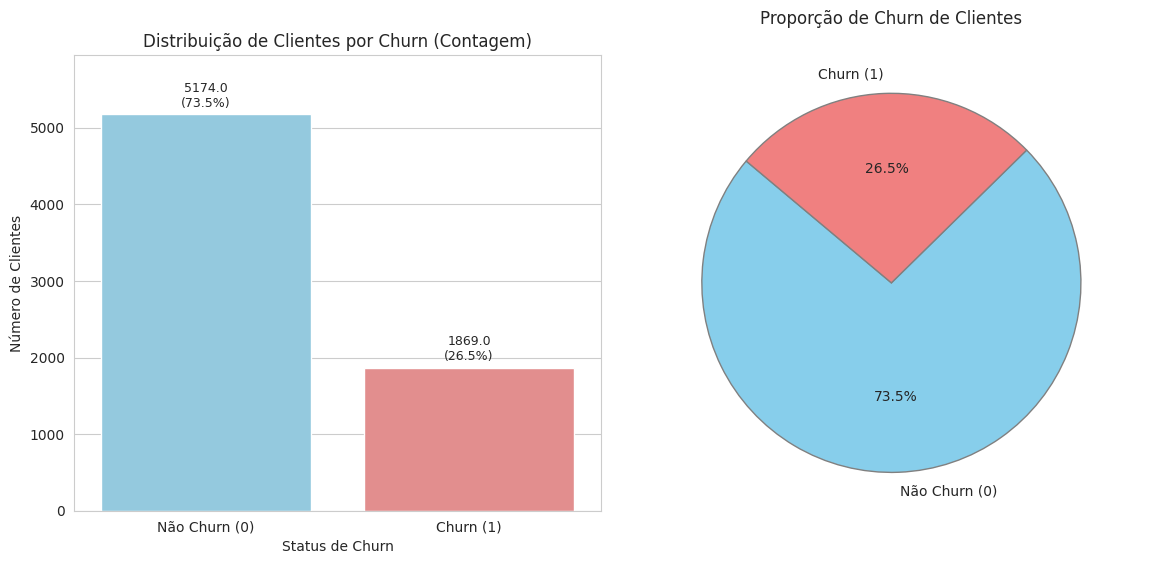

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

if 'Churn' in df.columns and df['Churn'].isin([0, 1]).all():

    # 1. Gr√°fico de Barras (Contagem) com Seaborn (COM AJUSTES)
    plt.subplot(1, 2, 1)
    ax_countplot = sns.countplot(
        x='Churn',
        data=df,
        hue='Churn',
        palette=['skyblue', 'lightcoral'],
        order=[0, 1],
        legend=False
    )
    plt.title('Distribui√ß√£o de Clientes por Churn (Contagem)')
    plt.xlabel('Status de Churn')
    plt.ylabel('N√∫mero de Clientes')

    ax_countplot.set_xticks([0, 1])
    ax_countplot.set_xticklabels(['N√£o Churn (0)', 'Churn (1)'])
    ax_countplot.margins(y=0.15)

    for p in ax_countplot.patches:
        height = p.get_height()
        ax_countplot.text(p.get_x() + p.get_width() / 2.,
                height + (ax_countplot.get_ylim()[1] * 0.01),
                f'{height}\n({height / len(df) * 100:.1f}%)',
                ha="center", va="bottom", fontsize=9)

    # 2. Gr√°fico de Pizza com Matplotlib
    plt.subplot(1, 2, 2)
    churn_counts = df['Churn'].value_counts().sort_index()
    labels = ['N√£o Churn (0)', 'Churn (1)']
    colors = ['skyblue', 'lightcoral']

    if len(churn_counts) == 2:
        plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'grey'})
        plt.title('Propor√ß√£o de Churn de Clientes', y=1.05)
        plt.axis('equal')
    elif len(churn_counts) == 1:
        category = churn_counts.index[0]
        label_category = labels[category]
        plt.pie(churn_counts, labels=[label_category], colors=[colors[category]], autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'grey'})
        plt.title(f'Propor√ß√£o de Churn de Clientes (Todos s√£o {label_category})', y=1.05)
        plt.axis('equal')
    else:
        plt.text(0.5, 0.5, 'Dados de Churn insuficientes para gr√°fico de pizza.', horizontalalignment='center', verticalalignment='center')
        plt.title('Propor√ß√£o de Churn de Clientes', y=1.05)


    plt.tight_layout(pad=2.0)
    plt.show()

else:
    print("ERRO: A coluna 'Churn' n√£o foi encontrada ou n√£o est√° no formato bin√°rio (0 e 1) esperado.")
    if 'Churn' in df.columns:
        print(f"Valores √∫nicos atuais em 'Churn': {df['Churn'].unique()}")
        print(f"Tipo de dado atual de 'Churn': {df['Churn'].dtype}")

## 3.3 Contagem de Evas√£o por Vari√°veis Categ√≥ricas

### 3.3.1 Evas√£o x G√™nero do Cliente


--- An√°lise de Churn por: G√™nero de Cliente ---

Taxa de Churn (propor√ß√£o de '1') por Categoria:
Churn                 0       1
customer_gender                
Female           73.08%  26.92%
Male             73.84%  26.16%


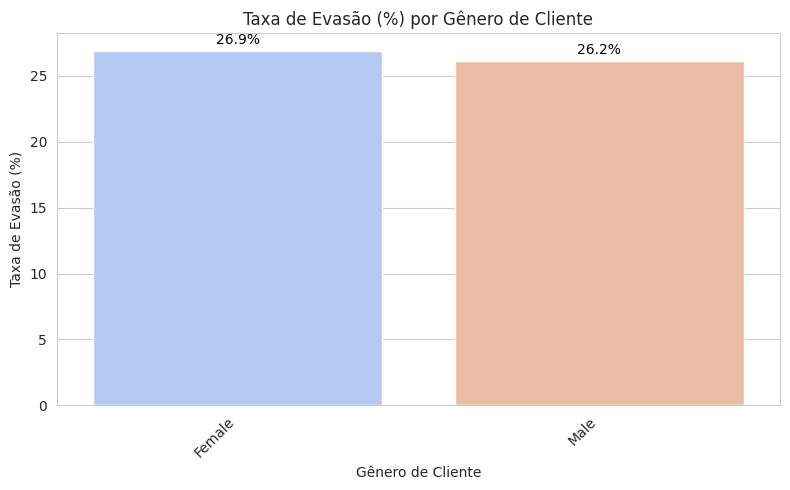

In [73]:
coluna_cat_analise = 'customer_gender'

if coluna_cat_analise in df.columns:
    print(f"\n--- An√°lise de Churn por: G√™nero de Cliente ---")

    # Taxa de Churn por Categoria
    print("\nTaxa de Churn (propor√ß√£o de '1') por Categoria:")
    taxa_churn_crosstab = pd.crosstab(df[coluna_cat_analise], df['Churn'], normalize='index') * 100
    print(taxa_churn_crosstab.round(2).astype(str) + '%')

    # Visualiza√ß√£o da Taxa de Churn por Categoria (Barplot)
    taxa_churn_para_plot = df.groupby(coluna_cat_analise)['Churn'].mean().mul(100).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=taxa_churn_para_plot.index, y=taxa_churn_para_plot.values, hue=taxa_churn_para_plot.index,
    palette="coolwarm", legend=False)
    plt.title(f'Taxa de Evas√£o (%) por G√™nero de Cliente')
    plt.ylabel('Taxa de Evas√£o (%)')
    plt.xlabel('G√™nero de Cliente')
    plt.xticks(rotation=45, ha='right')

    # Adicionar anota√ß√µes de percentual nas barras
    for i, v in enumerate(taxa_churn_para_plot.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", color='black', ha="center")
    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_cat_analise}' n√£o encontrada.")

### 3.3.2 Evas√£o x Cliente com Parceiro


--- An√°lise de Evas√£o por: Clientes com Parceiro(a) ---

Taxa de Churn (propor√ß√£o de '1') por Categoria:
customer_Partner
0    32.96%
1    19.66%
Name: Churn, dtype: object


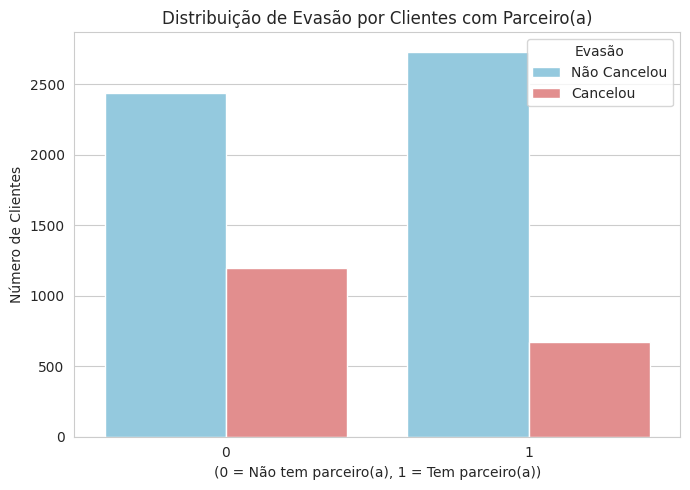

In [74]:
coluna_bin_analise = 'customer_Partner'

if coluna_bin_analise in df.columns:
    print(f"\n--- An√°lise de Evas√£o por: Clientes com Parceiro(a) ---")

    # Taxa de Churn
    taxa_churn_bin = df.groupby(coluna_bin_analise)['Churn'].mean().mul(100)
    print("\nTaxa de Churn (propor√ß√£o de '1') por Categoria:")
    print(taxa_churn_bin.round(2).astype(str) + '%') # (0=N√£o tem parceiro, 1=Tem parceiro)

    # Visualiza√ß√£o com countplot
    plt.figure(figsize=(7, 5))
    sns.countplot(x=coluna_bin_analise, hue='Churn', data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribui√ß√£o de Evas√£o por Clientes com Parceiro(a)')
    plt.ylabel('N√∫mero de Clientes')
    plt.xlabel('(0 = N√£o tem parceiro(a), 1 = Tem parceiro(a))')
    plt.legend(title='Evas√£o', labels=['N√£o Cancelou', 'Cancelou'])
    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_bin_analise}' n√£o encontrada.")

### 3.3.3 Evas√£o por M√©todo de Pagamento


--- An√°lise de Evas√£o por: M√©todo de Pagamento ---

Taxa de Evas√£o (propor√ß√£o de '1') por Categoria:
account_PaymentMethod
Bank transfer (automatic)    16.71%
Credit card (automatic)      15.24%
Electronic check             45.29%
Mailed check                 19.11%
Name: Churn, dtype: object


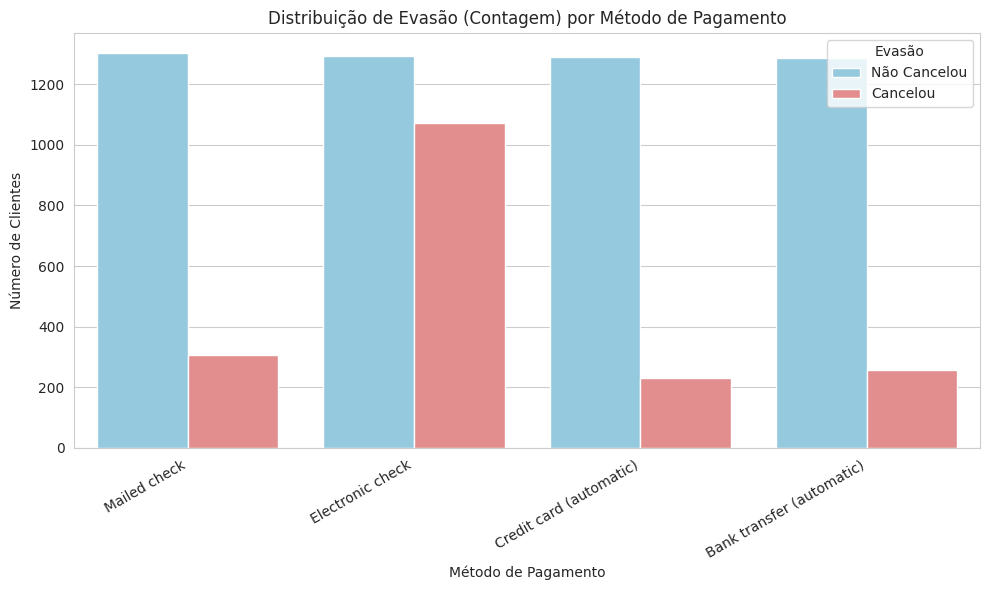

In [75]:
coluna_a_analisar = 'account_PaymentMethod'

if coluna_a_analisar in df.columns:
    print(f"\n--- An√°lise de Evas√£o por: M√©todo de Pagamento ---")

    # Taxa de Churn
    taxa_churn_calculada = df.groupby(coluna_a_analisar)['Churn'].mean().mul(100)
    print("\nTaxa de Evas√£o (propor√ß√£o de '1') por Categoria:")
    print(taxa_churn_calculada.round(2).astype(str) + '%')

    # Visualiza√ß√£o com countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=coluna_a_analisar, hue='Churn', data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribui√ß√£o de Evas√£o (Contagem) por M√©todo de Pagamento')
    plt.ylabel('N√∫mero de Clientes')
    plt.xlabel('M√©todo de Pagamento')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Evas√£o', labels=['N√£o Cancelou', 'Cancelou'])
    plt.tight_layout()
    plt.show()


else:
    print(f"ERRO: Coluna '{coluna_a_analisar}' n√£o encontrada.")

### 3.3.4 Evas√£o x Tipo de Contrato


--- An√°lise de Churn por: account_Contract ---

Taxa de Churn (propor√ß√£o de '1') por Categoria:
Churn                  0       1
account_Contract                
Month-to-month    57.29%  42.71%
One year          88.73%  11.27%
Two year          97.17%   2.83%


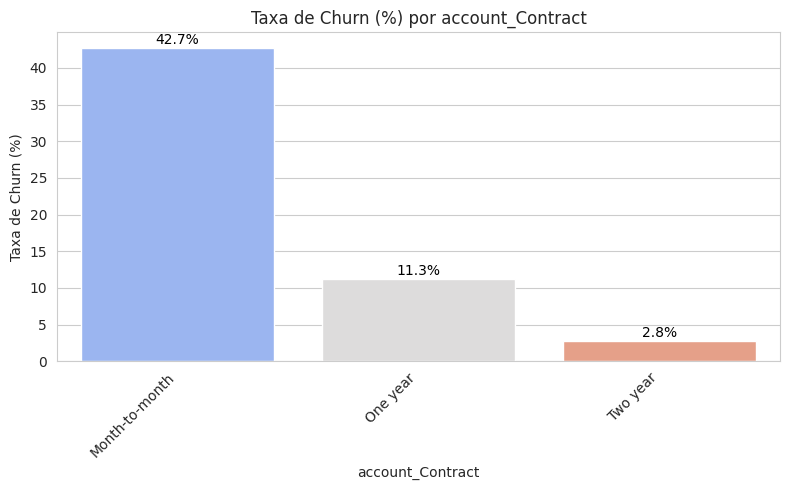

In [76]:
# --- Exemplo 1: account_Contract (M√∫ltiplas Categorias de Texto) ---
coluna_cat_analise = 'account_Contract'

if coluna_cat_analise in df.columns:
    print(f"\n--- An√°lise de Churn por: {coluna_cat_analise} ---")

    # Taxa de Churn por Categoria
    print("\nTaxa de Churn (propor√ß√£o de '1') por Categoria:")
    taxa_churn_crosstab = pd.crosstab(df[coluna_cat_analise], df['Churn'], normalize='index') * 100
    print(taxa_churn_crosstab.round(2).astype(str) + '%')

    # Visualiza√ß√£o da Taxa de Churn por Categoria (Barplot)
    taxa_churn_para_plot = df.groupby(coluna_cat_analise)['Churn'].mean().mul(100).sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=taxa_churn_para_plot.index, y=taxa_churn_para_plot.values, hue=taxa_churn_para_plot.index,
    palette="coolwarm", legend=False)
    plt.title(f'Taxa de Churn (%) por {coluna_cat_analise}')
    plt.ylabel('Taxa de Churn (%)')
    plt.xlabel(coluna_cat_analise)
    plt.xticks(rotation=45, ha='right')

    # Adicionar anota√ß√µes de percentual nas barras
    for i, v in enumerate(taxa_churn_para_plot.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", color='black', ha="center")
    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_cat_analise}' n√£o encontrada.")

## 3.4 Contagem de Evas√£o por Vari√°veis Num√©ricas

### 3.4.1 Contagem de Evas√£o por Tempo de Contrato


--- An√°lise de Churn por Vari√°vel Num√©rica: customer_tenure ---

Estat√≠sticas Descritivas por grupo de Evas√£o:
        mean  median    std  min  max
Churn                                
0      37.57    38.0  24.11    0   72
1      17.98    10.0  19.53    1   72


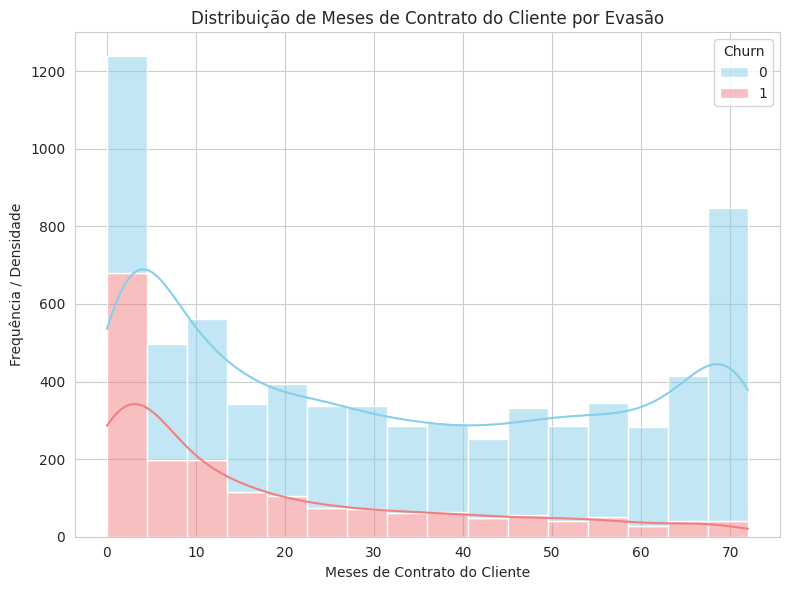

In [77]:
coluna_numerica_analise = 'customer_tenure'

if coluna_numerica_analise in df.columns:
    print(f"\n--- An√°lise de Churn por Vari√°vel Num√©rica: {coluna_numerica_analise} ---")

    # Estat√≠sticas Descritivas por Grupo de Churn
    print("\nEstat√≠sticas Descritivas por grupo de Evas√£o:")
    # Usando agg para selecionar m√©tricas espec√≠ficas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualiza√ß√µes Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribui√ß√£o de Meses de Contrato do Cliente por Evas√£o')
    plt.xlabel('Meses de Contrato do Cliente')
    plt.ylabel('Frequ√™ncia / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' n√£o encontrada.")

### 3.4.2 Contagem de Evas√£o por Total Gasto por M√™s


--- An√°lise de Evas√£o por Vari√°vel Num√©rica: Gasto Mensal ---

Estat√≠sticas Descritivas por grupo de Evas√£o:
        mean  median    std    min     max
Churn                                     
0      61.27   64.43  31.09  18.25  118.75
1      74.44   79.65  24.67  18.85  118.35


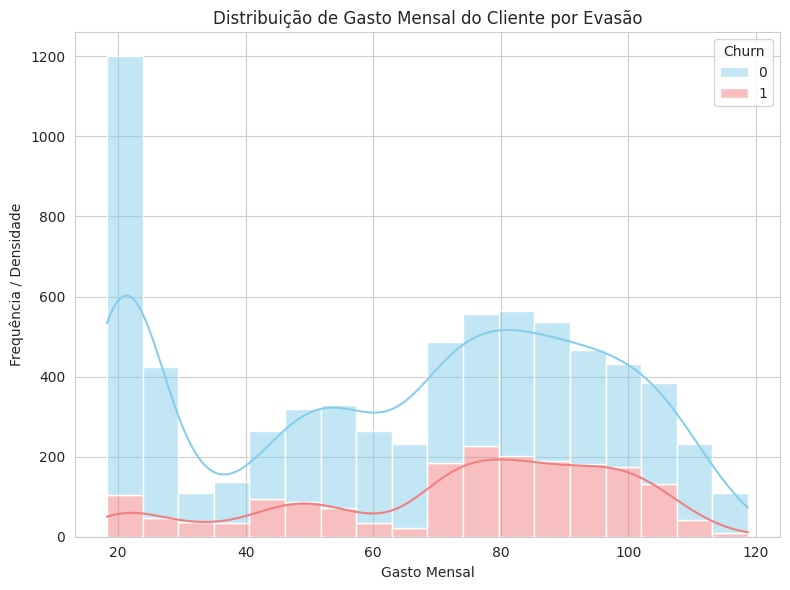

In [78]:
coluna_numerica_analise = 'account_Charges_Monthly'

if coluna_numerica_analise in df.columns:
    print(f"\n--- An√°lise de Evas√£o por Vari√°vel Num√©rica: Gasto Mensal ---")

    # Estat√≠sticas Descritivas por Grupo de Churn
    print("\nEstat√≠sticas Descritivas por grupo de Evas√£o:")
    # Usando agg para selecionar m√©tricas espec√≠ficas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualiza√ß√µes Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribui√ß√£o de Gasto Mensal do Cliente por Evas√£o')
    plt.xlabel('Gasto Mensal')
    plt.ylabel('Frequ√™ncia / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' n√£o encontrada.")

### 3.4.3 Contagem de Evas√£o por Total Gasto pelo Cliente


--- An√°lise de Evas√£o por Vari√°vel Num√©rica: Gasto Total ---

Estat√≠sticas Descritivas por grupo de Evas√£o:
          mean   median      std    min      max
Churn                                           
0      2549.91  1679.52  2329.95   0.00  8672.45
1      1531.80   703.55  1890.82  18.85  8684.80


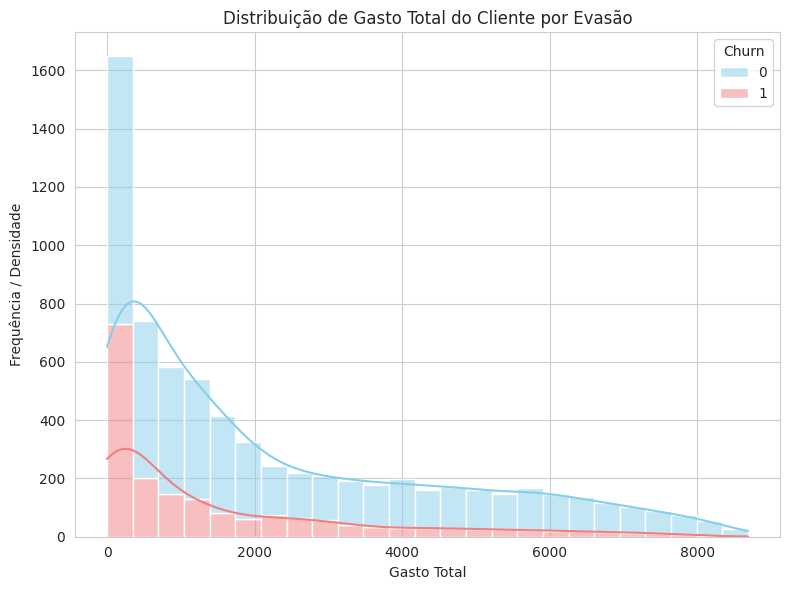

In [46]:
coluna_numerica_analise = 'account_Charges_Total'

if coluna_numerica_analise in df.columns:
    print(f"\n--- An√°lise de Evas√£o por Vari√°vel Num√©rica: Gasto Total ---")

    # Estat√≠sticas Descritivas por Grupo de Churn
    print("\nEstat√≠sticas Descritivas por grupo de Evas√£o:")
    # Usando agg para selecionar m√©tricas espec√≠ficas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualiza√ß√µes Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribui√ß√£o de Gasto Total do Cliente por Evas√£o')
    plt.xlabel('Gasto Total')
    plt.ylabel('Frequ√™ncia / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' n√£o encontrada.")

### 3.4.4 Contagem de Evas√£o por Total Gasto Di√°rio


--- An√°lise de Evas√£o por Vari√°vel Num√©rica: Gasto Total Di√°rio ---

Estat√≠sticas Descritivas por grupo de Evas√£o:
       mean  median   std   min   max
Churn                                
0      2.01    2.12  1.02  0.60  3.90
1      2.45    2.62  0.81  0.62  3.89


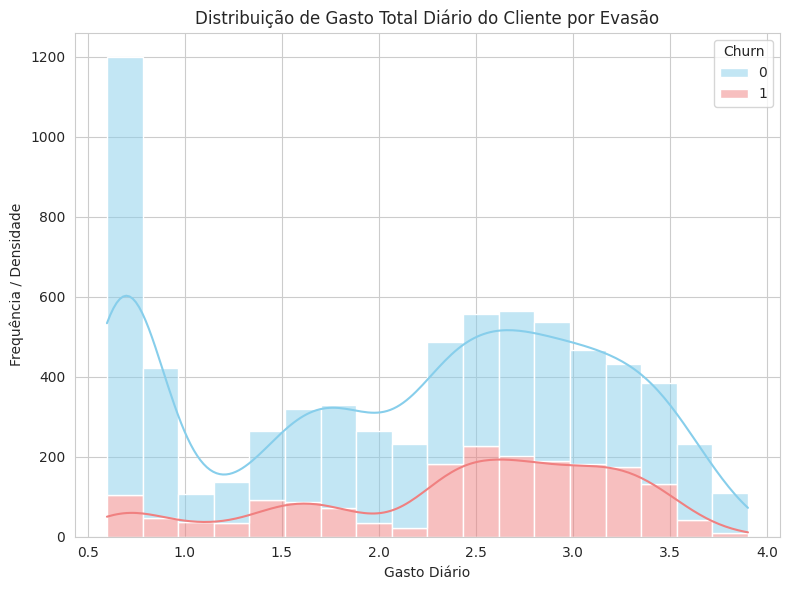

In [47]:
coluna_numerica_analise = 'Contas_Diarias'

if coluna_numerica_analise in df.columns:
    print(f"\n--- An√°lise de Evas√£o por Vari√°vel Num√©rica: Gasto Total Di√°rio ---")

    # Estat√≠sticas Descritivas por Grupo de Churn
    print("\nEstat√≠sticas Descritivas por grupo de Evas√£o:")
    # Usando agg para selecionar m√©tricas espec√≠ficas:
    desc_stats_churn = df.groupby('Churn')[coluna_numerica_analise].agg(['mean', 'median', 'std', 'min', 'max'])
    print(desc_stats_churn.round(2))

    # Visualiza√ß√µes Comparativas
    plt.figure(figsize=(8, 6))

    # Histograma/KDE Sobreposto
    sns.histplot(data=df, x=coluna_numerica_analise, hue='Churn', kde=True, palette=['skyblue', 'lightcoral'], multiple="stack")
    plt.title(f'Distribui√ß√£o de Gasto Total Di√°rio do Cliente por Evas√£o')
    plt.xlabel('Gasto Di√°rio')
    plt.ylabel('Frequ√™ncia / Densidade')

    plt.tight_layout()
    plt.show()

else:
    print(f"ERRO: Coluna '{coluna_numerica_analise}' n√£o encontrada.")

# üìÑ 4. Relat√≥rio Final

## Challenge Telecom X: An√°lise de Evas√£o de Clientes
---

**Autor(a):** Vitor Freitas
**Data:** 02/06/2025
**Programa:** Oracle Next Education - Alura | Trilha Data Science

---

### 1. Introdu√ß√£o

Nesta se√ß√£o, o objetivo √© apresentar o contexto do desafio e a import√¢ncia da an√°lise de evas√£o de clientes (churn) para a empresa fict√≠cia Telecom X.

**Objetivo da An√°lise:**
O presente projeto teve como finalidade principal realizar uma an√°lise explorat√≥ria sobre os dados de clientes da Telecom X. O foco foi identificar os principais fatores e padr√µes associados √† evas√£o de clientes (churn), com o intuito de fornecer insights que possam auxiliar a empresa na formula√ß√£o de estrat√©gias para aumentar a reten√ß√£o e reduzir o cancelamento de servi√ßos.

**O Problema de Evas√£o de Clientes (Churn):**
A evas√£o de clientes, ou churn, representa a taxa na qual clientes deixam de utilizar os servi√ßos ou produtos de uma empresa durante um determinado per√≠odo. Para empresas de telecomunica√ß√µes como a Telecom X, uma alta taxa de churn pode ter impactos significativos, incluindo:
* Perda de receita recorrente.
* Custos elevados para aquisi√ß√£o de novos clientes, que geralmente superam os custos de reten√ß√£o dos existentes.
* Potencial impacto negativo na reputa√ß√£o e na percep√ß√£o de valor da marca no mercado.

Compreender os motivos que levam os clientes a cancelar seus servi√ßos √©, portanto, fundamental para o desenvolvimento de a√ß√µes proativas e direcionadas, visando melhorar a satisfa√ß√£o do cliente, aumentar a lealdade e garantir a sustentabilidade do neg√≥cio a longo prazo.

---


### 2. Limpeza e Tratamento de Dados

Nesta se√ß√£o, descrevemos os passos metodol√≥gicos adotados para a coleta, limpeza, transforma√ß√£o e prepara√ß√£o dos dados dos clientes da Telecom X, garantindo sua qualidade e adequa√ß√£o para as an√°lises subsequentes.

* **Coleta e Carregamento dos Dados:**
    * Os dados brutos foram fornecidos em um arquivo no formato JSON, contendo informa√ß√µes diversas sobre os clientes, seus servi√ßos contratados e status de churn.
    * Utilizou-se a biblioteca Pandas do Python para carregar os dados. Devido √† estrutura aninhada do JSON, a fun√ß√£o `pd.json_normalize()` foi empregada para "achatar" os dados em um formato tabular (DataFrame), facilitando sua manipula√ß√£o e an√°lise.

* **Inspe√ß√£o Inicial e Estrutural:**
    * Ap√≥s o carregamento, foi realizada uma inspe√ß√£o inicial do DataFrame utilizando m√©todos como `df.info()`, `df.shape`, `df.head()`, e `df.dtypes` para compreender a dimensionalidade do conjunto de dados, os tipos de dados inferidos para cada coluna e a contagem de valores n√£o nulos.

* **Tratamento de Valores Ausentes (NaNs):**
    * A coluna `account_Charges_Total` apresentou valores problem√°ticos (strings vazias ou espa√ßos) que, ap√≥s convers√£o para formato num√©rico, resultaram em valores ausentes (`NaN`). Foi investigado que esses `NaN`s correspondiam a clientes com 0 meses de contrato (`customer_tenure`). Estes foram ent√£o imputados com o valor `0.0`, refletindo a aus√™ncia de cobran√ßa total acumulada para novos clientes.
    * A coluna `Churn` (vari√°vel alvo) tamb√©m apresentou strings vazias (`''`). Estas foram primeiramente convertidas para `NaN` e, subsequentemente, as linhas contendo `Churn` ausente foram removidas do DataFrame para garantir a integridade da vari√°vel alvo para a an√°lise de evas√£o.
    * Ap√≥s todos os tratamentos, verificou-se que o DataFrame final n√£o continha mais valores ausentes (`df.isnull().sum().sum() == 0`).

* **Tratamento de Duplicatas:**
    * Foi realizada uma verifica√ß√£o para identificar linhas duplicadas no conjunto de dados, n√£o sendo encontradas duplicatas.

* **Corre√ß√£o de Tipos de Dados:**
    * A coluna `account_Charges_Total` foi convertida do tipo `object` para o tipo num√©rico `float64` para permitir c√°lculos e an√°lises estat√≠sticas.

* **Engenharia de Features (Cria√ß√£o de Novas Colunas):**
    * Foi criada a coluna `Contas_Diarias` atrav√©s da divis√£o da coluna `account_Charges_Monthly` por uma m√©dia de dias no m√™s (30.4375), mantendo a precis√£o original do c√°lculo.

* **Padroniza√ß√£o e Transforma√ß√£o de Dados:**
    * **Mapeamento de Categ√≥ricas para Bin√°rio:** Colunas com respostas textuais bin√°rias (ex: "Yes"/"No" em `customer_Partner`, `phone_PhoneService`) foram mapeadas para valores num√©ricos `1` e `0` respectivamente.
    * Colunas categ√≥ricas com tr√™s estados (ex: `phone_MultipleLines` e os servi√ßos adicionais de internet, ex: `internet_OnlineSecurity`, onde havia "Yes", "No", e "No X service") tamb√©m foram convertidas para um formato bin√°rio (`1` para 'Yes', e `0` para 'No' ou 'No X service'), simplificando-as para indicar a posse ou n√£o do servi√ßo espec√≠fico.
    * **Renomea√ß√£o de Colunas:** Os nomes das colunas foram padronizados (ex: `customer_gender`, `account_Charges_Monthly`).
---

### 3. An√°lise Explorat√≥ria de Dados (EDA)

Nesta se√ß√£o, s√£o apresentados os principais achados da an√°lise explorat√≥ria, com foco em identificar padr√µes e rela√ß√µes entre as vari√°veis e a evas√£o de clientes. As visualiza√ß√µes s√£o cruciais para ilustrar essas descobertas.

* **An√°lise Descritiva Geral:**
    * O conjunto de dados final, ap√≥s limpeza e tratamento, consiste em **7043** clientes e **22** vari√°veis.
    * A taxa de churn geral observada na base de clientes analisada √© de aproximadamente **26.5%** (com 73.5% de clientes n√£o evadindo).

* **Distribui√ß√£o de Vari√°veis Chave:**
    * **Tempo de Contrato (`customer_tenure`):** A m√©dia de tempo de contrato √© de **32.37** meses, com uma mediana de **29** meses. A distribui√ß√£o √© **assim√©trica √† direita, indicando uma concentra√ß√£o maior de clientes com tempo de contrato mais curto e alguns clientes com tempo de contrato consideravelmente mais longo.**
    * **Cobran√ßas Mensais (`account_Charges_Monthly`):** A cobran√ßa mensal m√©dia √© de R$**64.76**, variando de R$**18.25** a R$**118.75**.
    * **Tipo de Contrato (`account_Contract`):** A maioria dos clientes (**55.02%**) est√° em contratos do tipo "Month-to-month".

* **Rela√ß√£o das Vari√°veis com o Churn (An√°lise Bivariada):**
    * **Vari√°veis Categ√≥ricas vs. Churn:**
        * **Tipo de Contrato (`account_Contract`):** Observou-se que clientes com contrato "Month-to-month" apresentam uma taxa de churn de **42.71%**, significativamente superior aos contratos de "One year" (**11.27%**) e "Two year" (**2.83%**).
        * **Servi√ßo de Internet (`internet_InternetService`):** Observou-se uma varia√ß√£o significativa na taxa de churn conforme o tipo de servi√ßo de internet. Clientes com 'Fiber optic' apresentaram a maior taxa de churn (**41.89%**), seguidos por clientes com 'DSL' (**18.96%**). Aqueles sem servi√ßo de internet da empresa ('No') tiveram a menor taxa de churn (**7.4%**).
        * **M√©todo de Pagamento (`account_PaymentMethod`):** O m√©todo de pagamento "Electronic check" esteve associado √† maior taxa de churn (**45.29%**). Outros m√©todos como "Credit card (automatic)" (**15.24%**), "Bank transfer (automatic)" (**16.71%**), e "Mailed check" (**19.11%**) apresentaram taxas consideravelmente menores.
    * **An√°lise de Evas√£o por Vari√°veis Num√©ricas:**
        * **Tempo de Contrato (`customer_tenure`):** Clientes que evadiram tinham, em m√©dia, **17.98** meses de contrato, enquanto os que permaneceram tinham, em m√©dia, **37.57** meses. A mediana tamb√©m mostrou uma diferen√ßa clara (**10** meses para quem evadiu vs. **38** meses para quem ficou).
        * **Cobran√ßas Mensais (`account_Charges_Monthly`):** Clientes que cancelaram o servi√ßo apresentavam uma cobran√ßa mensal m√©dia de R$**74.44**, em compara√ß√£o com R$**61.27** para os que ficaram.
        * **Cobran√ßas Totais (`account_Charges_Total`):** Em termos de cobran√ßas totais acumuladas, os clientes que evadiram registraram uma m√©dia de R$**1531.80** (mediana de R$**703.55**), valor inferior √† m√©dia de R$**2549.91** (mediana de R$**1679.52**) dos clientes que permaneceram. Isso se alinha com o menor tempo de contrato dos clientes que cancelaram.
        * **Contas Di√°rias (`Contas_Diarias`):** De forma similar √†s cobran√ßas mensais, as contas di√°rias m√©dias foram maiores para clientes que evadiram (R$**2.45**, mediana R$**2.62**) em compara√ß√£o com os que n√£o evadiram (R$**2.01**, mediana R$**2.12**).
---

### 4. Conclus√µes e Insights

Com base na an√°lise explorat√≥ria de dados, foram identificados diversos fatores e padr√µes que parecem influenciar a decis√£o de um cliente em cancelar os servi√ßos da Telecom X. Os principais insights s√£o:

* **Contratos Mensais como Principal Fator de Risco:** Clientes com contratos "Month-to-month" representam o grupo com a maior taxa de evas√£o. A flexibilidade desse tipo de contrato parece facilitar a sa√≠da do cliente.
* **Import√¢ncia do Tempo de Contrato (Tenure):** H√° uma clara correla√ß√£o negativa entre o tempo que um cliente permanece na empresa e sua probabilidade de churn. Clientes mais novos s√£o significativamente mais propensos a cancelar.
* **Impacto das Cobran√ßas Mensais/Di√°rias:** Clientes que evadiram tendem a ter cobran√ßas mensais e di√°rias mais altas, sugerindo que o custo pode ser um fator decisivo para o cancelamento.
* **Influ√™ncia do Tipo de Servi√ßo de Internet:** Clientes que utilizam 'Fiber optic' demonstraram a maior taxa de churn (41.89%) entre os usu√°rios de internet, superando os clientes com 'DSL' (18.96%). Embora a fibra √≥tica seja um servi√ßo premium, **sugere-se que seu custo potencialmente mais elevado pode ser um fator contribuinte para essa maior taxa de evas√£o.** Clientes sem servi√ßo de internet da empresa apresentaram a menor taxa de churn (7.4%).
* **M√©todo de Pagamento:** O m√©todo "Electronic check" esteve associado a uma taxa de churn significativamente mais elevada (45.29%). Isso pode sugerir um menor n√≠vel de comprometimento do cliente por ser um m√©todo menos automatizado, ou pode estar relacionado a uma maior ocorr√™ncia de falhas no processamento de pagamentos, burocracia e menor comodidade em compara√ß√£o com m√©todos autom√°ticos, gerando frustra√ß√£o.

Esses achados s√£o cruciais pois permitem √† Telecom X direcionar seus esfor√ßos de reten√ß√£o de forma mais eficaz, focando nos segmentos de clientes e nos aspectos do servi√ßo que se mostraram mais cr√≠ticos.

---

### 5. Recomenda√ß√µes

Com base nas conclus√µes e insights obtidos, as seguintes recomenda√ß√µes s√£o propostas para a Telecom X com o objetivo de reduzir a evas√£o de clientes:

1.  **Estrat√©gias para Contratos Mensais:**
    * Desenvolver campanhas ativas para incentivar clientes com contratos "Month-to-month" a migrarem para planos de maior dura√ß√£o (1 ou 2 anos), oferecendo descontos progressivos, benef√≠cios adicionais ou b√¥nus de fidelidade.
    * Revisar a proposta de valor dos planos mensais para entender se o pre√ßo ou os servi√ßos oferecidos est√£o alinhados com as expectativas do mercado.

2.  **Foco na Reten√ß√£o de Novos Clientes (Baixo Tenure):**
    * Implementar um programa de "onboarding" mais robusto e acompanhamento proativo para clientes nos primeiros meses de contrato (ex: primeiros 3-6 meses).
    * Oferecer suporte t√©cnico priorit√°rio ou canais de atendimento dedicados para novos clientes para garantir uma boa experi√™ncia inicial.

3.  **An√°lise e Otimiza√ß√£o de Pre√ßos e Planos:**
    * Investigar a satisfa√ß√£o dos clientes com os diferentes tipos de servi√ßo de internet, especialmente aqueles com maior taxa de churn (como Fiber Optic), e considerar se o custo-benef√≠cio percebido est√° adequado ou se h√° problemas de estabilidade/servi√ßo que anulam as vantagens da tecnologia.

4.  **Revis√£o dos M√©todos de Pagamento:**
    * Analisar a experi√™ncia do cliente com o m√©todo de pagamento "Electronic check" para identificar e solucionar poss√≠veis pontos de atrito (ex: falhas, dificuldade de uso).
    * Incentivar ativamente a ado√ß√£o de m√©todos de pagamento autom√°ticos e mais convenientes (como d√©bito autom√°tico em cart√£o de cr√©dito ou conta banc√°ria), possivelmente oferecendo pequenos descontos ou benef√≠cios para quem optar por esses m√©todos.

5.  **Monitoramento Cont√≠nuo e Modelagem Preditiva:**
    * Recomenda-se que a Telecom X continue monitorando essas m√©tricas e padr√µes de churn regularmente.
    * Os dados preparados e os insights desta an√°lise servem como uma excelente base para o desenvolvimento de modelos preditivos de churn, que podem identificar clientes com alto risco de evas√£o antes que eles efetivamente cancelem, permitindo a√ß√µes de reten√ß√£o ainda mais personalizadas e proativas.

---